NAME: AYESHA M

REG NO: 212224060034

PULSE CODE MODULATION AND DELTA MODULATION

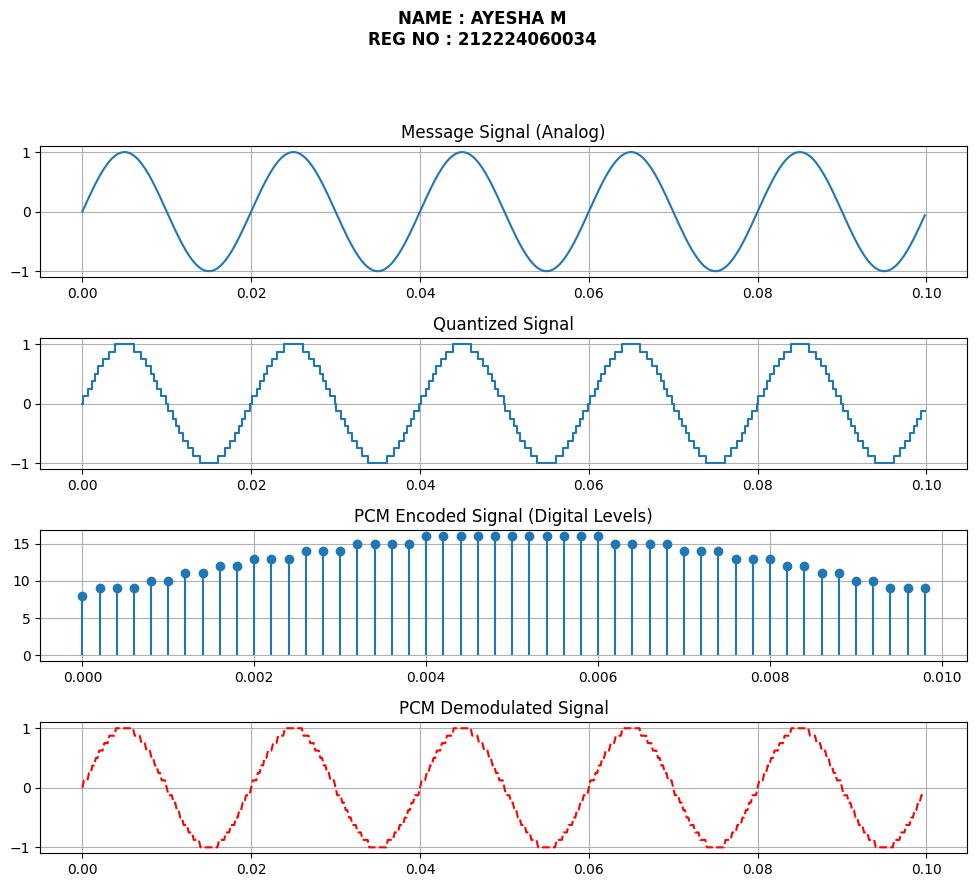

In [2]:
#PCM

import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs, fm, T, L = 5000, 50, 0.1, 16
t = np.arange(0, T, 1/fs)

# Message signal
m = np.sin(2*np.pi*fm*t)

# Quantization (PCM)
step = (m.max() - m.min()) / L
q = np.round(m / step) * step

# PCM encoding (digital levels)
pcm = ((q - q.min()) / step).astype(int)

# Plot
plt.figure(figsize=(10,9))
plt.suptitle("NAME : AYESHA M\nREG NO : 212224060034",
             fontsize=12, fontweight='bold')

plt.subplot(4,1,1)
plt.plot(t, m)
plt.title("Message Signal (Analog)")
plt.grid(True)

plt.subplot(4,1,2)
plt.step(t, q, where='mid')
plt.title("Quantized Signal")
plt.grid(True)

plt.subplot(4,1,3)
plt.stem(t[:50], pcm[:50], basefmt=" ")
plt.title("PCM Encoded Signal (Digital Levels)")
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(t, q, 'r--')
plt.title("PCM Demodulated Signal")
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()

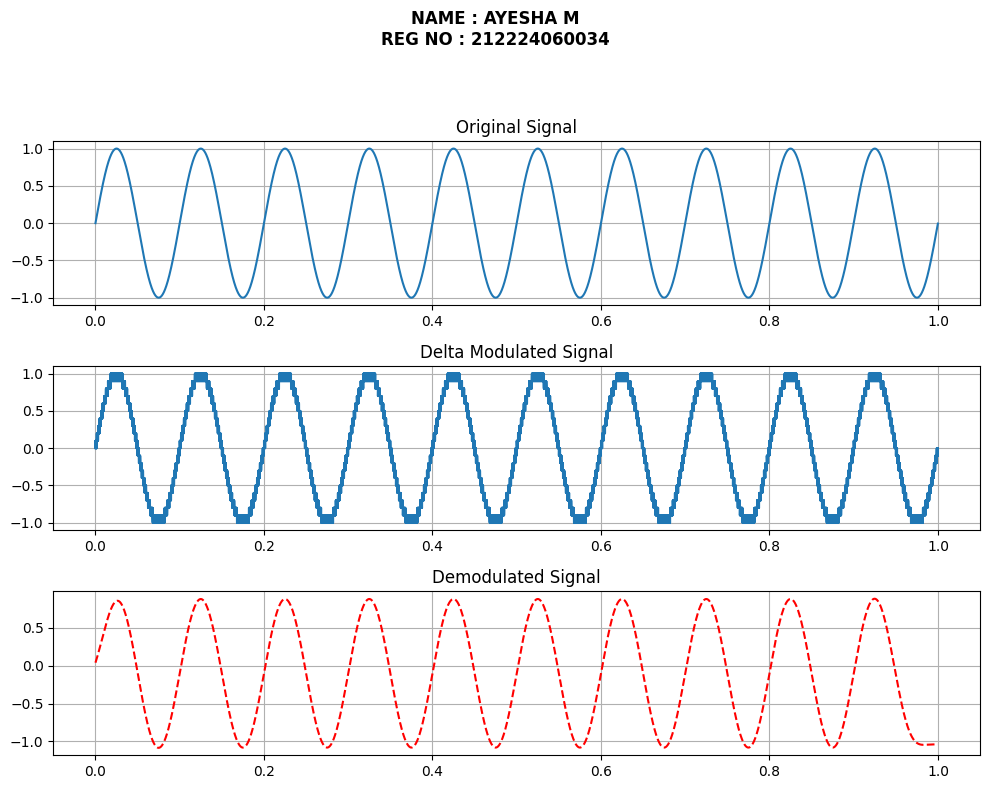

In [3]:
#Delta Modulation

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parameters
fs, fm, T, delta = 10000, 10, 1, 0.1
t = np.arange(0, T, 1/fs)

# Message signal
m = np.sin(2*np.pi*fm*t)

# Delta Modulation (Encoder)
dm = np.zeros_like(m)
bits = np.zeros_like(m)
for i in range(1, len(m)):
    if m[i] > dm[i-1]:
        bits[i] = 1
        dm[i] = dm[i-1] + delta
    else:
        dm[i] = dm[i-1] - delta

# Delta Demodulation
rec = np.cumsum((2*bits - 1) * delta)

# Low-pass filter
b, a = butter(4, 20/(0.5*fs), 'low')
rec_filt = filtfilt(b, a, rec)

# Plot
plt.figure(figsize=(10,8))
plt.suptitle("NAME : AYESHA M\nREG NO : 212224060034",
             fontsize=12, fontweight='bold')

plt.subplot(3,1,1)
plt.plot(t, m)
plt.title("Original Signal")
plt.grid(True)

plt.subplot(3,1,2)
plt.step(t, dm, where='mid')
plt.title("Delta Modulated Signal")
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, rec_filt, 'r--')
plt.title("Demodulated Signal")
plt.grid(True)

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()
